# AIM0407D2203 Lab 2B Learning-Based Closed Domain Chatbot (Machine Learning):
---

Pada eksperimen sebelumnya (AIM0407D2203 Lab 2A), kita telah berhasil membuat chatbot berbasis aturan. Chatbot berbasis aturan memanfaatkan pola regular expression untuk mencocokkan input pengguna dengan jawaban yang sudah ditentukan sebelumnya. Meskipun sederhana dan mudah diimplementasikan, chatbot berbasis aturan tidak dapat menangkap kesalahan penulisan (typo) input pengguna. Hal ini dikarenakan input pengguna tidak ditemukan di aturan yang dibangun sebelumnya. Karena batasan ini, chatbot berbasis aturan sulit dikembangkan.

Pada era yang lebih modern, pernahkah kamu mencari bantuan pelanggan untuk mengajukan pertanyaan secara online? Jika pernah, kemungkinan besar interaksi kamu adalah dengan chatbot.

Pertanyaan berikutnya, apakah kamu merasa bahwa chatbot itu cukup pintar menjawab pertanyaan yang kamu berikan meskipun terdapat kesalahan penulisan? Jika iya, chatbot tersebut merupakan jenis chatbot berbasis pembelajaran. Telah banyak perusahaan menggunakan chatbot berbasis pembelajaran yang dilatih untuk subjek tertentu, ini sering disebut sebagai chatbot domain tertutup berbasis pembelajaran. 

Misalnya, jika kamu ingin mengetahui status penerbanganmu, kamu dapat melakukan obrolan seperti ini:

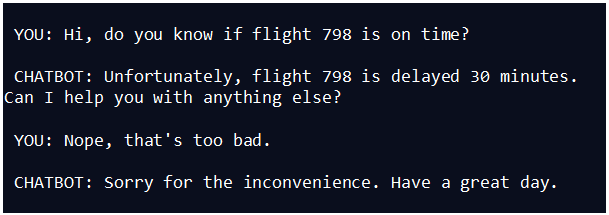

Dalam contoh percakapan di atas, chatbot memberikan balasan yang paling masuk akal atau sangat mirip dengan pertanyaan yang diberikan pengguna. Chatbot ini secara khusus dilatih untuk menangani laporan pelanggan atau pertanyaan tentang penerbangan lainnya.

Pada pendekatan ini, data berisi pertanyaan dan jawaban yang sesuai dilatih dengan algoritma pembelajaran tertentu. Dimana setiap pertanyaan telah diberi label sebelumnya. Label ini digunakan untuk menghubungan pertanyaan dengan jawaban yang sesuai. Karena beberapa pertanyaan mungkin memiliki jawaban yang sama, maka terdapat beberapa pertanyaan memiliki jawaban yang sama.

Setelah dilatih, pengklasifikasi akan memprediksi label berdasarkan input yang  dberikan. Jadi, ketika pengguna menuliskan 'hai', maka pengklasifikasi akan memprediksi label '1'. Kemudian, label tersebut digunakan untuk menemukan jawaban yang sesuai. Secara umum, skema yang akan kita lakukan umtuk eksperimen ini akan mengikuti bagan berikut:

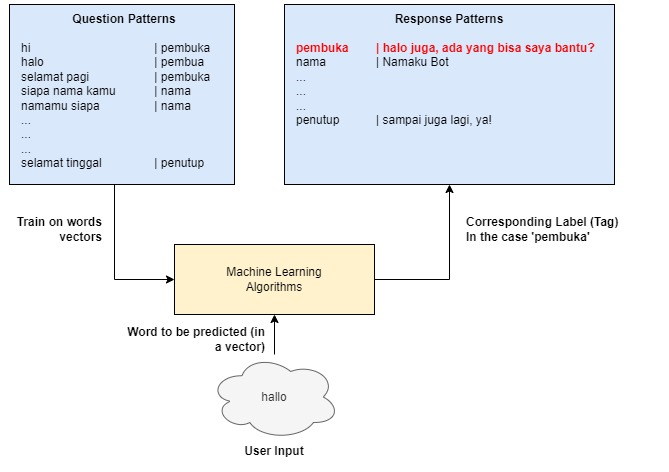





# 01 Install & Import Library

In [ ]:
import string
import pickle
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import random

import json
import pandas as pd
from random import choice

# 02 Data Acquisition

In [ ]:
# https://drive.google.com/u/1/uc?id=1kyfYTUQlDGXmfSL0oOeWDkVXivvJu7O7&export=download
!gdown 1kyfYTUQlDGXmfSL0oOeWDkVXivvJu7O7

Downloading...
From: https://drive.google.com/uc?id=1kyfYTUQlDGXmfSL0oOeWDkVXivvJu7O7
To: /content/AIM0407D2203 Lab 2B Dataset.zip
100% 1.42k/1.42k [00:00<00:00, 1.30MB/s]


In [ ]:
!unzip -q 'AIM0407D2203 Lab 2B Dataset.zip'

In [ ]:
!ls

'AIM0407D2203 Lab 2B Dataset.zip'   dataset.json   sample_data


In [ ]:
with open("dataset.json") as data_file:
  data = json.load(data_file)

In [ ]:
print(json.dumps(data, indent=2))

{
  "intents": [
    {
      "tag": "salam",
      "patterns": [
        "Hai",
        "Hi",
        "Halo",
        "Selamat Pagi",
        "Selamat Siang",
        "Selamat Malam"
      ],
      "responses": [
        "Halo, ada yang bisa saya bantu?",
        "Halo, selamat datang",
        "Hai, salam kenal"
      ]
    },
    {
      "tag": "bye",
      "patterns": [
        "Selamat Tinggal",
        "Dah",
        "Semoga harimu menyenangkan",
        "Sampai Jumpa Lagi",
        "Ok bye"
      ],
      "responses": [
        "Sampai jumpa lagi yaa",
        "Kalau ada masalah, hubungi aku di instagram @orbitfutureacademyid ya ",
        "Semoga harimu menyenangkan!"
      ]
    },
    {
      "tag": "nama",
      "patterns": [
        "nama kamu siapa?",
        "namamu siapa?",
        "siapa sih lo?",
        "kamu siapa?",
        "nama?"
      ],
      "responses": [
        "Namaku OFA Bot, salam kenal ya!",
        "Halo, aku OFA Bot!",
        "Kenalin, aku OFA Bot!"
  

In [ ]:
text_input = []
intents = []

for intent in data['intents']:
  for pattern in intent['patterns']:
    text_input.append(pattern)
    intents.append(intent['tag'])

df = pd.DataFrame({'text_input': text_input, 'intents': intents})

df.head()

,text_input,intents
0,Hai,salam
1,Hi,salam
2,Halo,salam
3,Selamat Pagi,salam
4,Selamat Siang,salam


In [ ]:
responses = {}

for intent in data['intents']:
  for resp in intent['responses']:
    if intent['tag'] in responses.keys():
      responses[intent['tag']].append(resp)
    else:
      responses[intent['tag']] = [resp]

print(json.dumps(responses, indent=2))

{
  "salam": [
    "Halo, ada yang bisa saya bantu?",
    "Halo, selamat datang",
    "Hai, salam kenal"
  ],
  "bye": [
    "Sampai jumpa lagi yaa",
    "Kalau ada masalah, hubungi aku di instagram @orbitfutureacademyid ya ",
    "Semoga harimu menyenangkan!"
  ],
  "nama": [
    "Namaku OFA Bot, salam kenal ya!",
    "Halo, aku OFA Bot!",
    "Kenalin, aku OFA Bot!"
  ],
  "pekerjaan": [
    "Aku akan membantu dalam menjawab pertanyaamu tentang Orbit Future Academy",
    "Tugasku jadi asisten di Orbit Future Academy. Silahkan bertanya"
  ],
  "tentang_ofa": [
    "Orbit Future Academy didirikan dengan tujuan untuk meningkatkan kualitas hidup melalui inovasi, pendidikan, dan pelatihan keterampilan. Brand Orbit merupakan kelanjutan dari warisan mendiang Dr Hasri Ainun Habibie dan Prof. Dr. Ing. B. J. Habibie, Presiden ke-3 Republik Indonesia. Mereka berdua telah menjadi penggerak dalam mendukung perkembangan inovasi dan teknologi pendidikan di Indonesia."
  ],
  "program_ofa": [
    "O

In [ ]:
df.shape

(46, 2)

In [ ]:
df.intents.value_counts()

tentang_program    7
salam              6
tentang_ofa        6
bye                5
nama               5
sosmed_ofa         5
pekerjaan          4
program_ofa        4
metode_belajar     4
Name: intents, dtype: int64

# 03 Text Preprocessing

In [ ]:
import re

def text_preprocessing(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()                               # Menghapus whitespaces
  return text

In [ ]:
# Implementasikan fungsi text preprocessing ke dataset
df['clean_text_input'] = df.text_input.apply(text_preprocessing)

# 04 Feature Extraction (Bag of Words)

In [ ]:
'''
Convert a collection of text documents to a matrix of token counts.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
'''
from sklearn.feature_extraction.text import CountVectorizer

# BoW - Unigram
bow = CountVectorizer(ngram_range=(1,1))

# Membuat fitur dari data teks yang sudah dilakukan text preprocessing
bow.fit(df['clean_text_input'])

# Melihat jumlah fitur pada vocabulary
print(len(bow.get_feature_names_out()))

67


In [ ]:
# Melihat fitur-fitur apa saja yang ada di dalam vocabulary
print(bow.get_feature_names_out()[:10])   # Batasi hanya 10 fitur teratas

['academy' 'ai' 'aja' 'apa' 'bagaimana' 'bedanya' 'belajarnya' 'bye'
 'cara' 'dah']


In [ ]:
# Ubah data teks menjadi matriks
# text_vect = vect.transform(df.text_input_prep)
text_vect = bow.transform(df['clean_text_input'])

# 05 Modelling (Naive Bayes Classifier)

In [ ]:
clf = MultinomialNB()                   # Deklarasi objek MultinomialNB dari SkLearn

clf.fit(text_vect, df.intents)          # Training
clf.score(text_vect, df.intents)

0.9347826086956522

In [ ]:
chat = input("Masukkan String: ")    
chat = text_preprocessing(chat)         # Text preprocessing
chat = bow.transform([chat])            # Feature extraction. Mengubah teks menjadi vektor

res = clf.predict_proba(chat)           # Prediksi vektor teks kedalam model machine learning

# Agar hasil menjadi lebih natural, kita lakukan prediksi dengan probabilitas sehingga apabila hasil prediksi kurang dari threshold probabilitas yang ditentukan, 
# Kita bisa membubuat bot untuk mengatakan "tidak mengerti"
# Ambil nilai probabilitas tertinggi
max_prob = max(res[0])
max_idx = np.argmax(res[0])
print(f"Max Prob : {max_prob}\nMax Index: {max_idx}\nLabel: {clf.classes_[max_idx]}")

Masukkan String: Halllo
Max Prob : 0.15217391304347824
Max Index: 8
Label: tentang_program


# 06 Simple Inference Engine

In [ ]:
def get_response(intent):
  return random.choice(responses[intent])
  
def chat():
  print("Kamu terhubung dengan chatbot OFA. Ketik 'bye' untuk mengakhiri obrolan.")
  exit = False

  while not exit:
    chat = input("🧑 Kamu\t: ")       
    chat = text_preprocessing(chat)       # Text preprocessing
    chat = bow.transform([chat])          # Feature extraction. Mengubah teks menjadi vektor

    res = clf.predict_proba(chat)         # Prediksi vektor teks kedalam model machine learning

    max_prob = max(res[0])                # Ambil nilai probabilitas & index lokasinya
    max_idx = np.argmax(res[0])

    # Kondisi jika probabilitas kurang dari threshold yang ditentukan
    if max_prob < 0.2:
      print("🤖 Bot\t: Maaf, saya tidak mengerti apa yang kamu maksud :(")
    else:
      for tg in data['intents']:
        if tg['tag'] == max_idx:
          responses = tg['responses']
      if clf.classes_[max_idx] == 'bye':
        exit = True
        print("🤖 Bot\t: Obrolan berakhir ...")
      print(f"🤖 Bot\t: {get_response(clf.classes_[max_idx])}")

In [ ]:
chat()

Kamu terhubung dengan chatbot OFA. Ketik 'bye' untuk mengakhiri obrolan.
🧑 Kamu	: halo
🤖 Bot	: Halo, ada yang bisa saya bantu?
🧑 Kamu	: kamu ngapain?
🤖 Bot	: Aku akan membantu dalam menjawab pertanyaamu tentang Orbit Future Academy
🧑 Kamu	: apa itu orbit?
🤖 Bot	: Orbit Future Academy didirikan dengan tujuan untuk meningkatkan kualitas hidup melalui inovasi, pendidikan, dan pelatihan keterampilan. Brand Orbit merupakan kelanjutan dari warisan mendiang Dr Hasri Ainun Habibie dan Prof. Dr. Ing. B. J. Habibie, Presiden ke-3 Republik Indonesia. Mereka berdua telah menjadi penggerak dalam mendukung perkembangan inovasi dan teknologi pendidikan di Indonesia.
🧑 Kamu	: wow keren
🤖 Bot	: Maaf, saya tidak mengerti apa yang kamu maksud :(
🧑 Kamu	: program apa saja
🤖 Bot	: Orbit Future Academy menjadi mitra MSIB Kemdikbud. Ada dua program yang sedang berjalan saat ini: AI Mastery dan AI for Jobs
🧑 Kamu	: ai mastery
🤖 Bot	: AI Mastery dikhususkan untuk kamu yang ingin mendalami tentang AI dan AI for